In [145]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler , MinMaxScaler , LabelEncoder



In [146]:
!pip install kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import kagglehub

In [148]:

url = "https://drive.google.com/uc?id=1SZzVrF_t3WmgNdSUlo-XaTdkBGHMd54r&export=download"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)



In [149]:
df

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31706,49,Writer,37188.10,1,4,5,3,7,12,5.38,3.0,Good,620.64,39.080823,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good,357
31707,49,Writer,37188.10,1,4,5,3,7,12,5.38,3.0,Good,620.64,32.803431,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good,358
31708,49,Writer,37188.10,1,4,5,3,3,12,5.38,3.0,Good,620.64,36.979007,NM,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good,360
31709,50,Writer,37188.10,1,4,5,3,5,12,5.38,3.0,Good,620.64,37.753013,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good,362


In [150]:
df.shape

(31711, 21)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

In [152]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
count,31711.000000,3.171100e+04,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000
mean,35.135032,1.749045e+05,4.415818,4.801583,10.256504,2.234114,14.985967,26.493299,8.601820,3.903030,776.983756,32.522218,59.287714,181.502288,439.647331,243.861026
std,11.037186,1.415577e+06,2.305062,1.673844,5.916633,1.700965,9.353937,215.388313,5.119076,2.813889,443.968460,5.135545,53.461204,196.253121,225.424866,108.853693
min,14.000000,7.006520e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.832487,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2.211810e+04,3.000000,4.000000,6.000000,1.000000,8.000000,6.000000,4.550000,2.000000,388.920000,28.299138,16.414812,61.938256,293.841559,195.000000
50%,35.000000,3.699394e+04,4.000000,5.000000,9.000000,2.000000,13.000000,11.000000,8.370000,4.000000,780.210000,32.501616,46.162077,121.191802,369.698223,256.000000
75%,44.000000,7.452061e+04,6.000000,6.000000,14.000000,3.000000,22.000000,15.000000,11.620000,6.000000,1182.500000,36.731398,89.163419,225.891543,523.103061,329.000000
max,56.000000,2.419806e+07,10.000000,10.000000,34.000000,9.000000,60.000000,4397.000000,26.900000,12.000000,1499.920000,49.564519,199.904691,1903.080048,1602.040519,404.000000


In [153]:
df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [154]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')

In [155]:
df.sample(5)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
8938,37,Writer,94053.570,4,4,14,3,22,12,11.96,0.0,Standard,815.38,27.133978,No,197.132487,883.182046,Low_spent_Small_value_payments,5.165217,Standard,0
12695,24,Engineer,14839.245,3,2,10,2,15,10,8.06,3.0,Good,1408.61,33.088878,No,13.418114,139.361040,Low_spent_Small_value_payments,251.981221,Good,357
18711,47,Scientist,18186.220,7,4,15,0,27,16,5.49,4.0,Standard,1.42,41.153967,No,0.000000,19.172325,High_spent_Medium_value_payments,406.979509,Standard,223
15198,31,Architect,10455.875,6,5,12,3,11,0,11.71,0.0,Good,83.16,40.465827,No,25.748448,80.255305,Low_spent_Small_value_payments,256.928539,Good,278
11536,54,Engineer,55644.140,5,3,6,4,26,21,3.64,4.0,Standard,147.64,36.436453,No,181.776424,316.431884,High_spent_Small_value_payments,252.592859,Standard,250


In [156]:
# Separate numerical and categorical columns


num_col = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_col = df.select_dtypes(include=["object"]).columns.tolist()

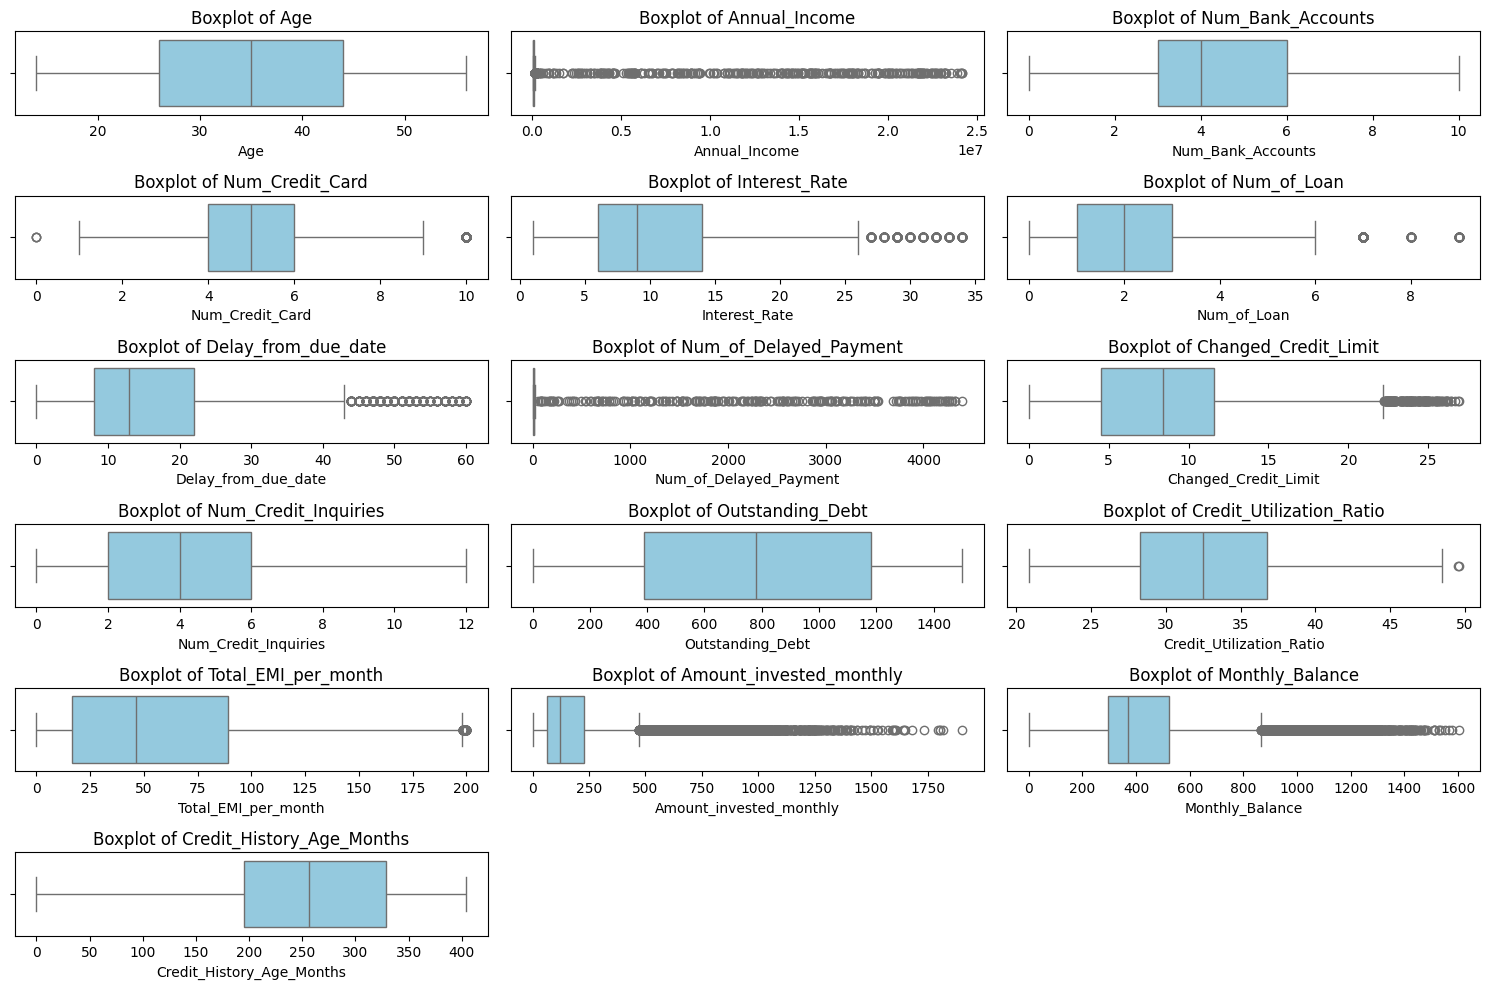

In [157]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot((len(columns) // 3) + 1, 3, i)  # Create subplots in a grid
        sns.boxplot(data=df, x=col, color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()

plot_boxplots(df, num_col)

plt.show()

In [158]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Interest_Rate'
Q1 = df["Interest_Rate"].quantile(0.25)
Q3 = df["Interest_Rate"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [159]:
# Replace outliers with the median of the 'Interest_Rate' column
median_interest_rate = df["Interest_Rate"].median()
df.loc[df["Interest_Rate"] < lower_bound, "Interest_Rate"] = median_interest_rate
df.loc[df["Interest_Rate"] > upper_bound, "Interest_Rate"] = median_interest_rate

In [160]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Num_of_Loan'
Q1 = df["Num_of_Loan"].quantile(0.25)
Q3 = df["Num_of_Loan"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [161]:
# Replace outliers in 'Num_of_Loan' with the median
median_num_of_loan = df["Num_of_Loan"].median()
df.loc[df["Num_of_Loan"] < lower_bound, "Num_of_Loan"] = median_num_of_loan
df.loc[df["Num_of_Loan"] > upper_bound, "Num_of_Loan"] = median_num_of_loan

In [162]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Delay_from_due_date'
Q1 = df["Delay_from_due_date"].quantile(0.25)
Q3 = df["Delay_from_due_date"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [163]:
# Replace outliers in 'Delay_from_due_date' with the median
median_delay_from_due_date = df["Delay_from_due_date"].median()
df.loc[df["Delay_from_due_date"] < lower_bound, "Delay_from_due_date"] = median_delay_from_due_date
df.loc[df["Delay_from_due_date"] > upper_bound, "Delay_from_due_date"] = median_delay_from_due_date

In [164]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Changed_Credit_Limit'
Q1 = df["Changed_Credit_Limit"].quantile(0.25)
Q3 = df["Changed_Credit_Limit"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [165]:
# Replace outliers in 'Changed_Credit_Limit' with the median
median_changed_credit_limit = df["Changed_Credit_Limit"].median()
df.loc[df["Changed_Credit_Limit"] < lower_bound, "Changed_Credit_Limit"] = median_changed_credit_limit
df.loc[df["Changed_Credit_Limit"] > upper_bound, "Changed_Credit_Limit"] = median_changed_credit_limit


In [166]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Total_EMI_per_month'
Q1 = df["Total_EMI_per_month"].quantile(0.25)
Q3 = df["Total_EMI_per_month"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [167]:
# Replace outliers in 'Total_EMI_per_month' with the median
median_total_emi_per_month = df["Total_EMI_per_month"].median()
df.loc[df["Total_EMI_per_month"] < lower_bound, "Total_EMI_per_month"] = median_total_emi_per_month
df.loc[df["Total_EMI_per_month"] > upper_bound, "Total_EMI_per_month"] = median_total_emi_per_month


In [168]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Annual_Income'
Q1 = df["Annual_Income"].quantile(0.25)
Q3 = df["Annual_Income"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Annual_Income'
outliers_annual_income = df[(df["Annual_Income"] < lower_bound) | (df["Annual_Income"] > upper_bound)]
print(f"Number of outliers in Annual_Income: {len(outliers_annual_income)}")

# Optional: Show the outlier values
print("Outliers in Annual_Income:\n", outliers_annual_income)

Number of outliers in Annual_Income: 776
Outliers in Annual_Income:
        Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
79      40   Architect     6515990.00                  6                3   
81      55   Scientist      586359.00                  1                5   
120     30     Teacher     2709655.00                  2                6   
149     18   Scientist    19257912.00                  0                3   
234     55      Doctor     8908998.00                  1                7   
...    ...         ...            ...                ...              ...   
31355   49  Journalist      175718.64                  3                5   
31407   49    Mechanic    19805347.00                  6                4   
31448   21     Manager    18721299.00                  4                7   
31572   31      Lawyer     5794377.00                  5                4   
31603   53   Architect     8544730.00                  5                4   

      

In [169]:
# Cap the outliers in 'Annual_Income' by setting them to the lower and upper bounds
df["Annual_Income"] = df["Annual_Income"].clip(lower=lower_bound, upper=upper_bound)

# Verify if the values are capped
outliers_annual_income_after_clipping = df[(df["Annual_Income"] < lower_bound) | (df["Annual_Income"] > upper_bound)]

In [170]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Num_of_Delayed_Payment'
Q1 = df["Num_of_Delayed_Payment"].quantile(0.25)
Q3 = df["Num_of_Delayed_Payment"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Num_of_Delayed_Payment'
outliers_num_of_delayed_payment = df[(df["Num_of_Delayed_Payment"] < lower_bound) | (df["Num_of_Delayed_Payment"] > upper_bound)]
print(f"Number of outliers in Num_of_Delayed_Payment: {len(outliers_num_of_delayed_payment)}")

# Optional: Show the outlier values
print("Outliers in Num_of_Delayed_Payment:\n", outliers_num_of_delayed_payment)


Number of outliers in Num_of_Delayed_Payment: 235
Outliers in Num_of_Delayed_Payment:
        Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
172     47    Accountant       17787.34                  8                4   
199     18     Developer       27070.07                  7                3   
347     31    Accountant       59971.42                  8                5   
523     32     Architect       26716.09                  4                5   
568     31  Entrepreneur       60552.76                  3                7   
...    ...           ...            ...                ...              ...   
31218   45       Teacher       28702.52                  5                6   
31235   30        Writer       37769.92                  7                4   
31297   38    Accountant       23737.09                  4                5   
31527   28        Lawyer       21471.58                  7                3   
31640   44        Doctor       32625.59     

In [171]:
# Cap the outliers in 'Num_of_Delayed_Payment' by setting them to the upper bound
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].clip(upper=upper_bound)

# Verify if the values are capped
outliers_after_clipping = df[(df["Num_of_Delayed_Payment"] > upper_bound)]

In [172]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Amount_invested_monthly'
Q1 = df["Amount_invested_monthly"].quantile(0.25)
Q3 = df["Amount_invested_monthly"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Amount_invested_monthly'
outliers_amount_invested_monthly = df[(df["Amount_invested_monthly"] < lower_bound) | (df["Amount_invested_monthly"] > upper_bound)]
print(f"Number of outliers in Amount_invested_monthly: {len(outliers_amount_invested_monthly)}")

# Optional: Show the outlier values
print("Outliers in Amount_invested_monthly:\n", outliers_amount_invested_monthly)


Number of outliers in Amount_invested_monthly: 2491
Outliers in Amount_invested_monthly:
        Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
18      31        Lawyer       73928.46                  4                5   
31      33      Engineer       88640.24                  3                6   
34      35  Entrepreneur       54392.16                  6                4   
37      36  Entrepreneur       54392.16                  6                4   
47      20    Accountant       92047.08                  6                7   
...    ...           ...            ...                ...              ...   
31575   31        Lawyer      107911.60                  3                3   
31578   32        Lawyer      107911.60                  3                3   
31592   33     Architect      108484.38                  4                7   
31666   31      Mechanic       64511.34                  7                3   
31672   39       Manager       85744.12  

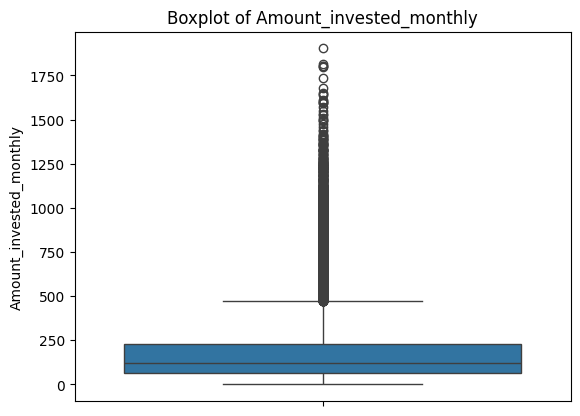

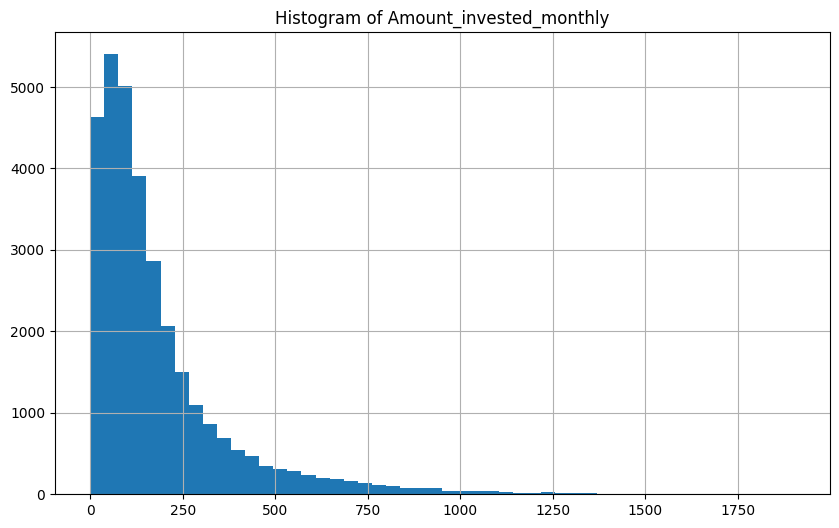

In [173]:
# Plot the distribution of 'Amount_invested_monthly'
sns.boxplot(df['Amount_invested_monthly'])
plt.title('Boxplot of Amount_invested_monthly')
plt.show()

# Histogram of 'Amount_invested_monthly'
df['Amount_invested_monthly'].hist(bins=50, figsize=(10, 6))
plt.title('Histogram of Amount_invested_monthly')
plt.show()

In [174]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].clip(lower=lower_bound, upper=upper_bound)


In [175]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Monthly_Balance'
Q1 = df["Monthly_Balance"].quantile(0.25)
Q3 = df["Monthly_Balance"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in 'Monthly_Balance'
outliers_Monthly_Balance = df[(df["Monthly_Balance"] < lower_bound) | (df["Monthly_Balance"] > upper_bound)]
print(f"Number of outliers in Monthly_Balance: {len(outliers_Monthly_Balance)}")

# Optional: Show the outlier values
print("Outliers in Monthly_Balance:\n", outliers_Monthly_Balance)


Number of outliers in Monthly_Balance: 2033
Outliers in Monthly_Balance:
        Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
48      20    Accountant       92047.08                  6                7   
49      20    Accountant       92047.08                  6                7   
129     42     Developer      123732.32                  4                3   
131     43     Developer      123732.32                  4                3   
137     45  Entrepreneur      118248.60                  5                1   
...    ...           ...            ...                ...              ...   
31573   31        Lawyer      146310.68                  5                4   
31574   31        Lawyer      146310.68                  5                4   
31576   31        Lawyer      107911.60                  3                3   
31577   31        Lawyer      107911.60                  3                3   
31597   34     Architect      108484.38                  

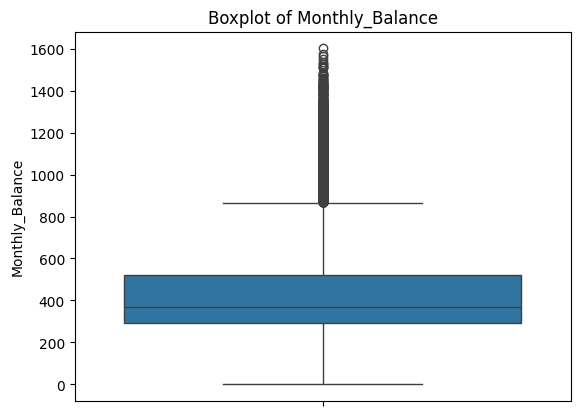

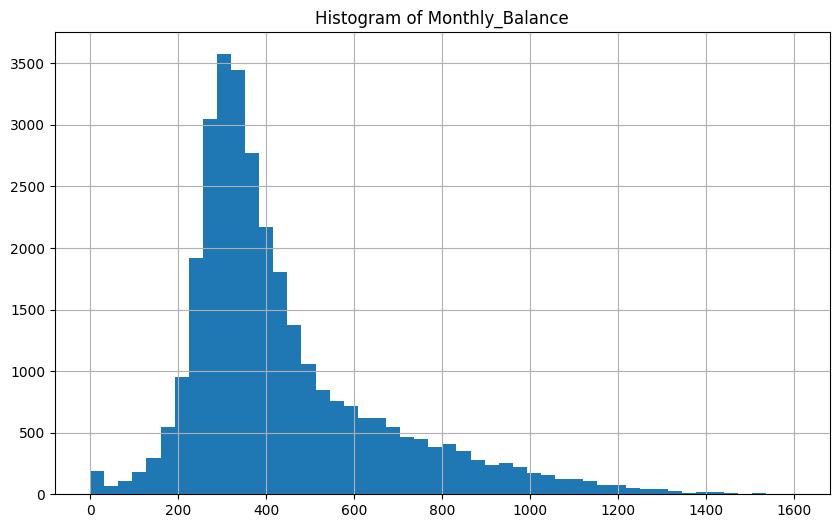

In [176]:

# Plot the distribution of 'Monthly_Balance'
sns.boxplot(df['Monthly_Balance'])
plt.title('Boxplot of Monthly_Balance')
plt.show()

# Histogram of 'Monthly_Balance'
df['Monthly_Balance'].hist(bins=50, figsize=(10, 6))
plt.title('Histogram of Monthly_Balance')
plt.show()


In [177]:
df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=lower_bound, upper=upper_bound)


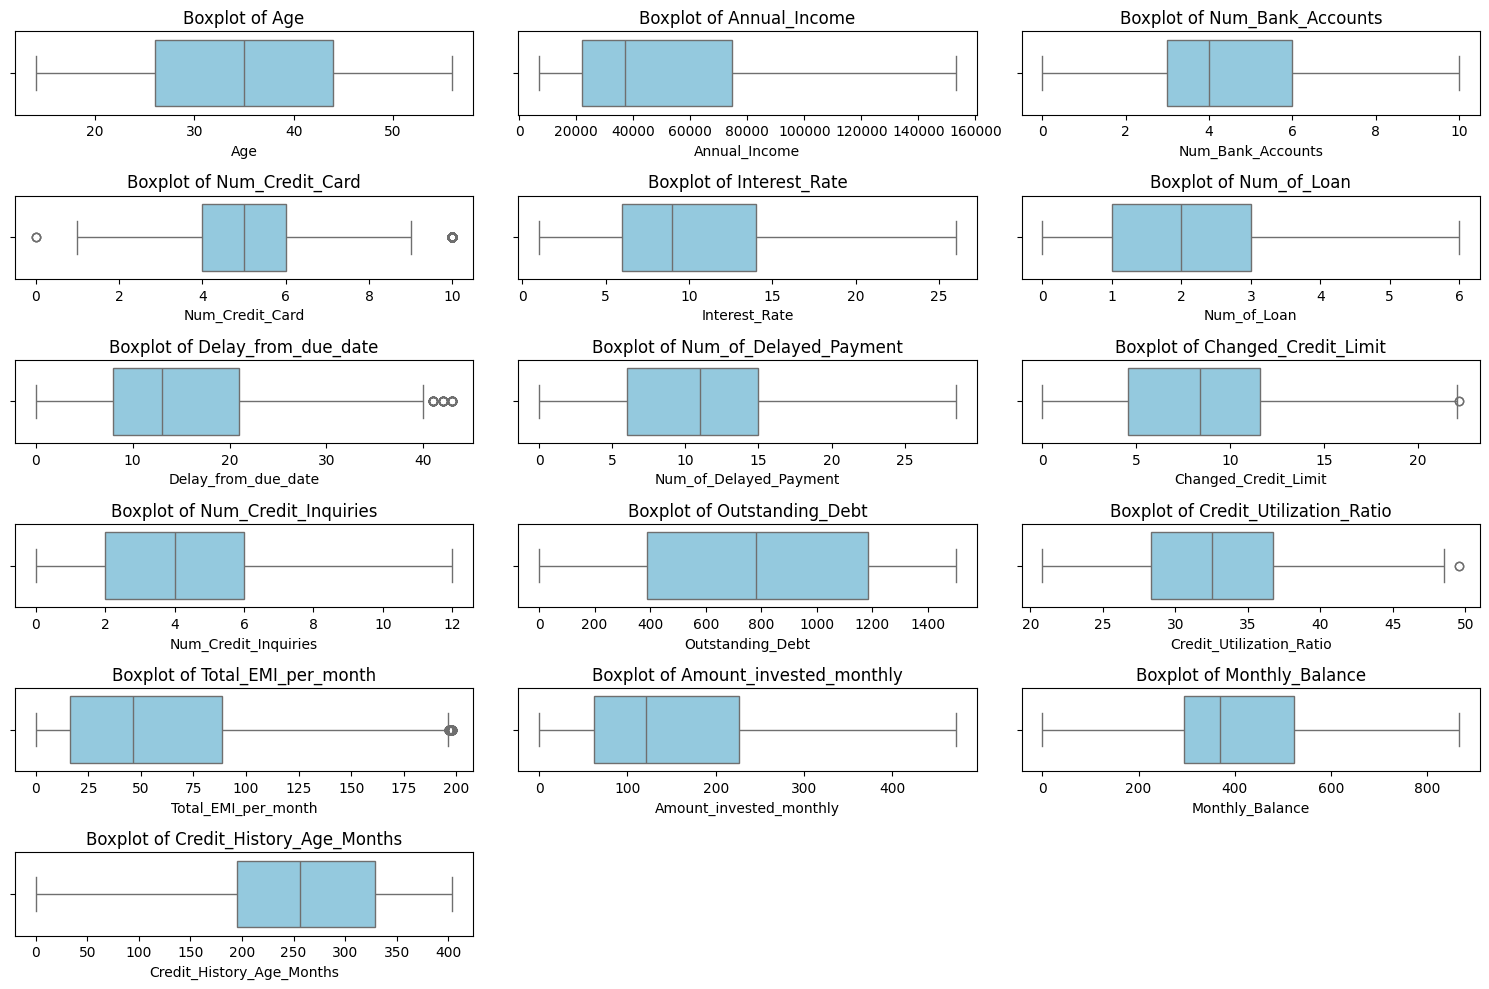

In [178]:
def plot_boxplots1(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot((len(columns) // 3) + 1, 3, i)  # Create subplots in a grid
        sns.boxplot(data=df, x=col, color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()

# Plot boxplots for numerical columns
plot_boxplots1(df, num_col)

# Show the plots
plt.show()

In [179]:
cat_col

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [180]:
df['Occupation'].value_counts()

Occupation
Lawyer           2401
Architect        2328
Media_Manager    2144
Teacher          2130
Accountant       2111
Developer        2105
Scientist        2102
Musician         2098
Journalist       2093
Entrepreneur     2088
Engineer         2042
Mechanic         2042
Manager          2022
Doctor           2022
Writer           1983
Name: count, dtype: int64

In [181]:
data =  pd.get_dummies(df,columns=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'],dtype="int")

In [182]:
data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Good,268,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,23,19114.12,3,4,3,4,6,0.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Good,269,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,23,19114.12,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,Good,271,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,23,19114.12,3,4,3,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168,Standard,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,28,34847.84,2,4,6,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214,Good,320,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0


In [183]:
num_col

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age_Months']

In [184]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


In [185]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
data[num_col] = scaler.fit_transform(df[num_col])


In [186]:
data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.126516,-1.032354,-0.451218,0.034462,0.074322,-0.222834,-0.173673,0.268851,-1.050343,Good,0.221760,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.008333,-1.666946,0.546050,0.034462,0.074322,-1.504221,-0.173673,-0.884119,-0.446141,Good,0.230946,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.397761,0.546050,0.034462,0.074322,-1.944250,-0.173673,0.114813,-0.942267,Good,0.249320,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.715057,0.546050,0.034462,0.074322,-1.672375,-0.173673,-1.005480,-0.360991,Standard,-2.240299,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,-0.646464,-0.462650,-1.048066,-0.478895,-0.733569,-0.732683,-0.890149,-1.508298,-0.221846,-0.676310,-0.387317,1.173921,-0.756089,-0.891626,0.286357,Good,0.699473,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0


In [187]:
#  All the data in "df" is as it is ........... The changes made after Encoding and Scaling are saved in a "data".

# **EDA**

In [188]:
data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.126516,-1.032354,-0.451218,0.034462,0.074322,-0.222834,-0.173673,0.268851,-1.050343,Good,0.221760,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.008333,-1.666946,0.546050,0.034462,0.074322,-1.504221,-0.173673,-0.884119,-0.446141,Good,0.230946,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.397761,0.546050,0.034462,0.074322,-1.944250,-0.173673,0.114813,-0.942267,Good,0.249320,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,-1.099485,-0.879627,-0.614231,-0.478895,-1.292375,1.231427,-1.362883,-0.715057,0.546050,0.034462,0.074322,-1.672375,-0.173673,-1.005480,-0.360991,Standard,-2.240299,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,-0.646464,-0.462650,-1.048066,-0.478895,-0.733569,-0.732683,-0.890149,-1.508298,-0.221846,-0.676310,-0.387317,1.173921,-0.756089,-0.891626,0.286357,Good,0.699473,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0


<Axes: ylabel='Age'>

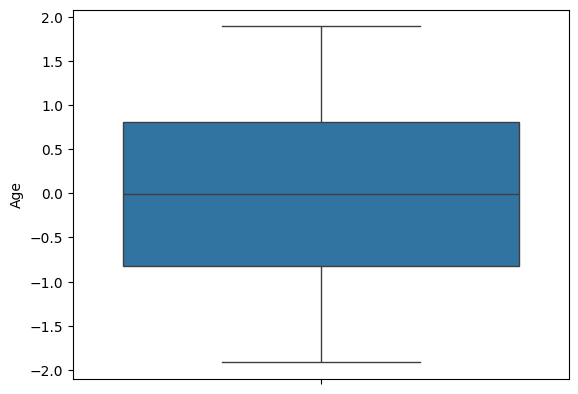

In [189]:
sns.boxplot(data['Age'])

<Axes: ylabel='Annual_Income'>

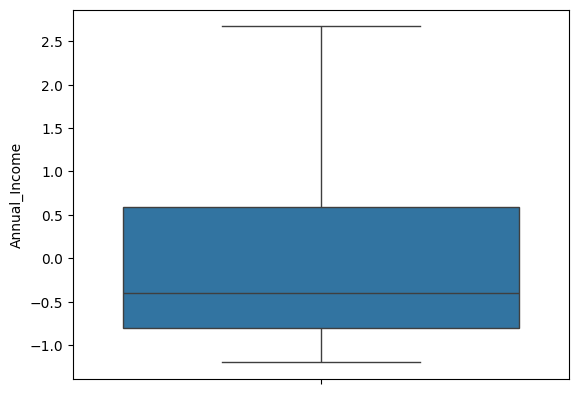

In [190]:
sns.boxplot(data['Annual_Income'])

<Axes: ylabel='Num_Bank_Accounts'>

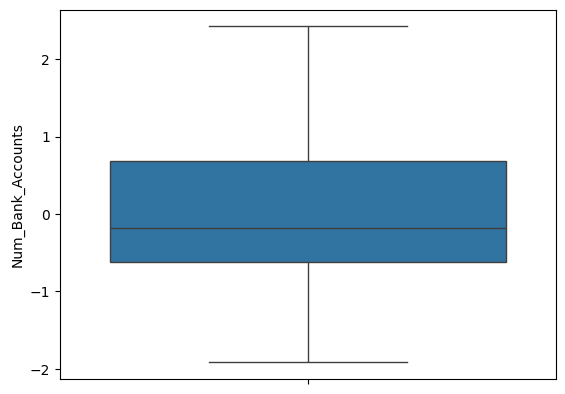

In [191]:
sns.boxplot(data['Num_Bank_Accounts'])

<Axes: ylabel='Num_Credit_Card'>

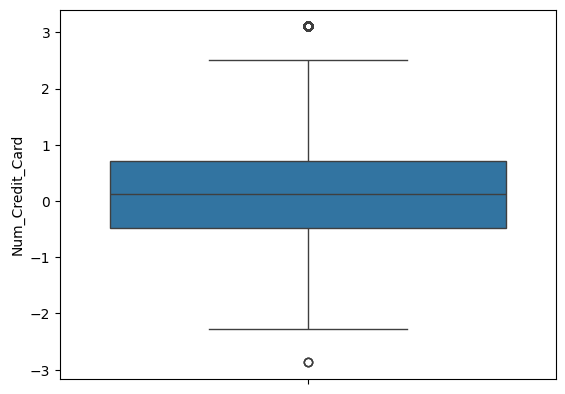

In [192]:
sns.boxplot(data['Num_Credit_Card'])

<Axes: ylabel='Interest_Rate'>

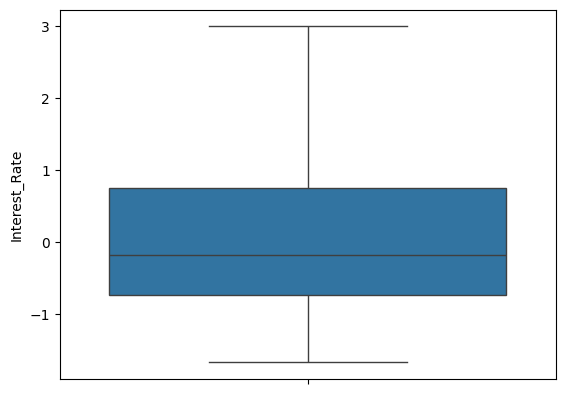

In [193]:
sns.boxplot(data['Interest_Rate'])

<Axes: ylabel='Num_of_Loan'>

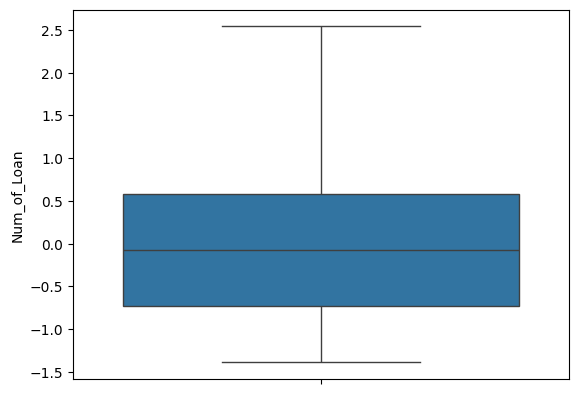

In [194]:
sns.boxplot(data['Num_of_Loan'])

<Axes: ylabel='Delay_from_due_date'>

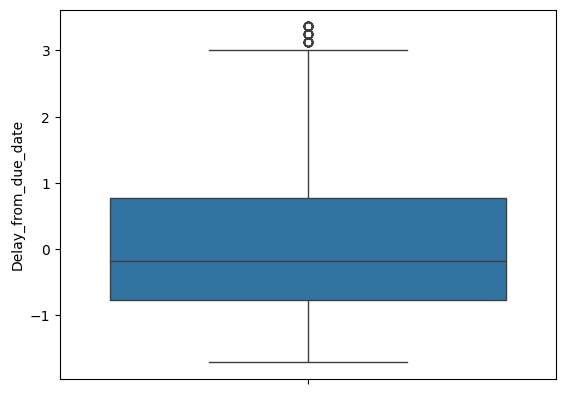

In [195]:
sns.boxplot(data['Delay_from_due_date'])

<Axes: ylabel='Num_of_Delayed_Payment'>

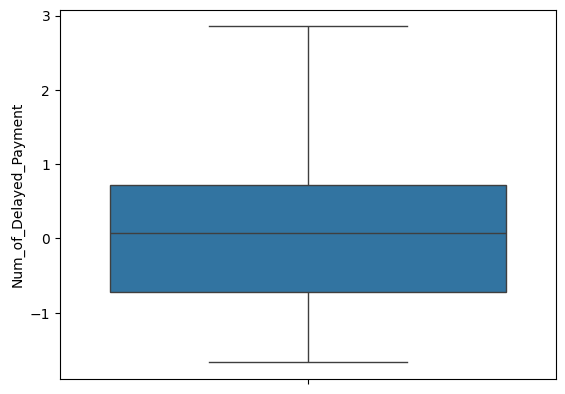

In [196]:
sns.boxplot(data['Num_of_Delayed_Payment'])

<Axes: ylabel='Changed_Credit_Limit'>

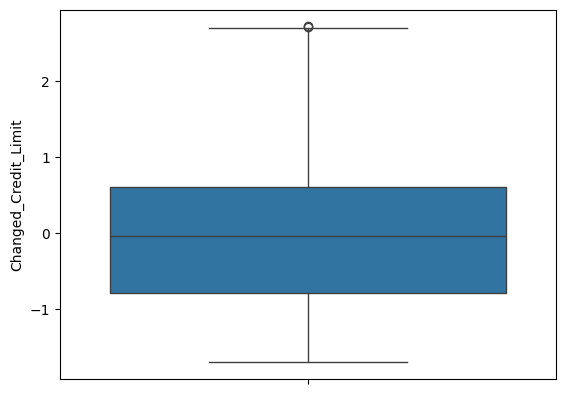

In [197]:
sns.boxplot(data['Changed_Credit_Limit'])

<Axes: ylabel='Num_Credit_Inquiries'>

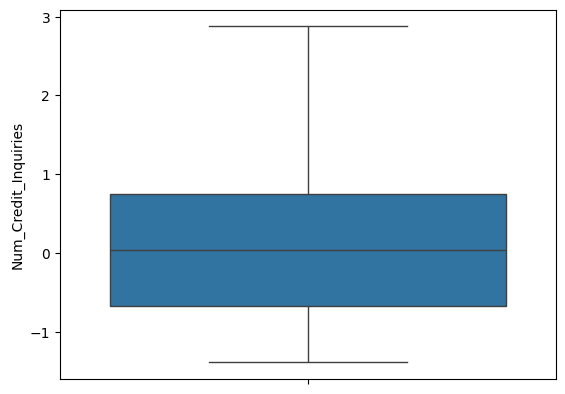

In [198]:
sns.boxplot(data['Num_Credit_Inquiries'])

<Axes: ylabel='Outstanding_Debt'>

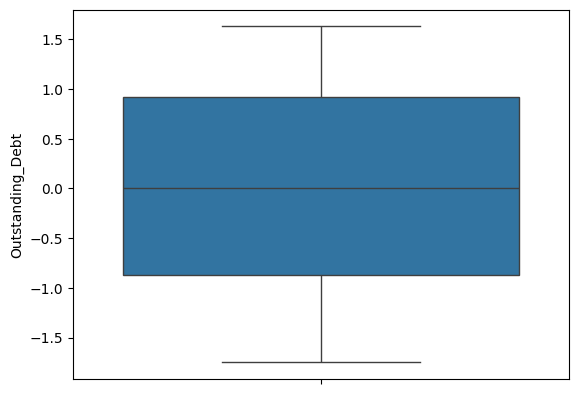

In [199]:
sns.boxplot(data['Outstanding_Debt'])

<Axes: ylabel='Credit_Utilization_Ratio'>

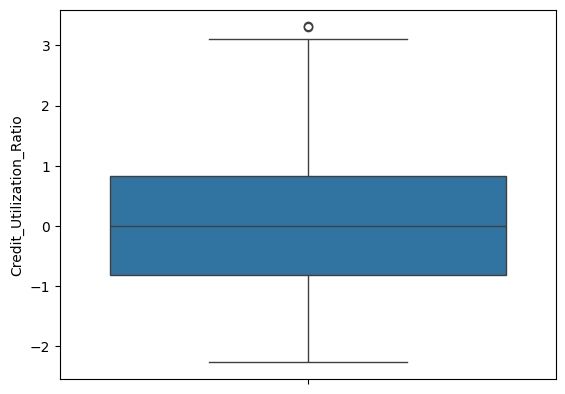

In [200]:
sns.boxplot(data['Credit_Utilization_Ratio'])

<Axes: ylabel='Total_EMI_per_month'>

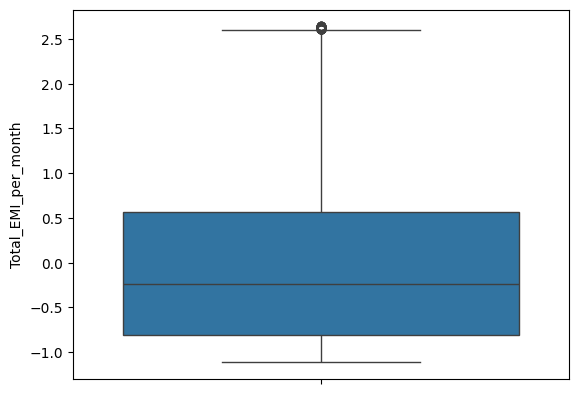

In [201]:
sns.boxplot(data['Total_EMI_per_month'])

<Axes: ylabel='Amount_invested_monthly'>

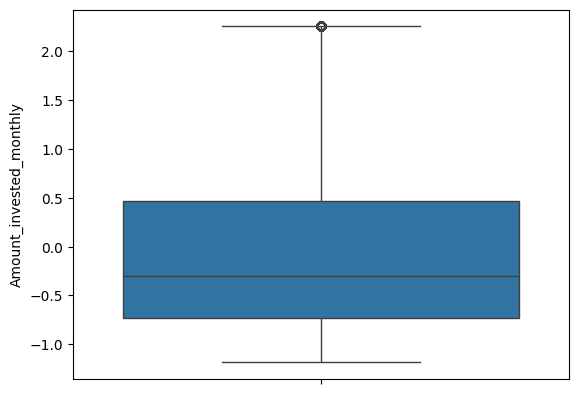

In [202]:
sns.boxplot(data['Amount_invested_monthly'])

<Axes: ylabel='Monthly_Balance'>

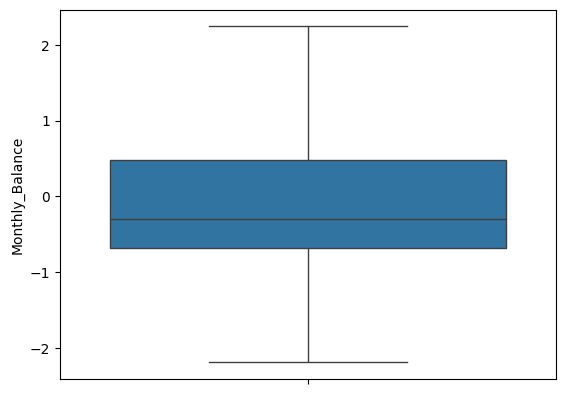

In [203]:
sns.boxplot(data['Monthly_Balance'])

<Axes: ylabel='Credit_History_Age_Months'>

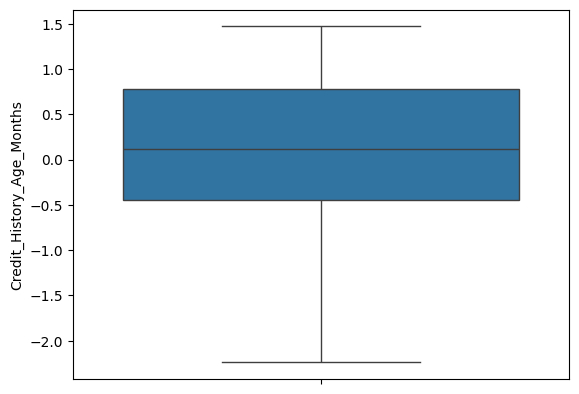

In [204]:
sns.boxplot(data['Credit_History_Age_Months'])

<Axes: ylabel='Occupation'>

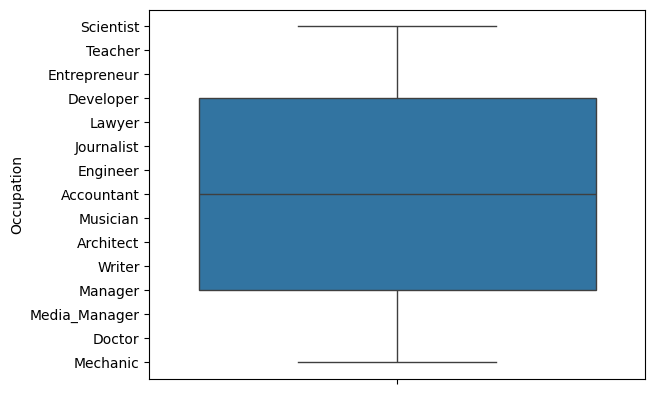

In [205]:
sns.boxplot(df['Occupation'])

<Axes: ylabel='Credit_Score'>

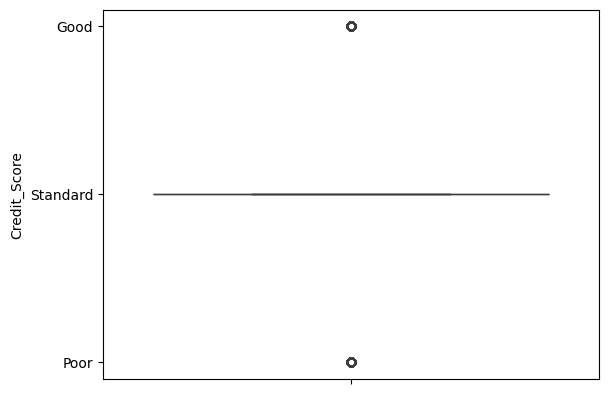

In [206]:
sns.boxplot(df["Credit_Score"])

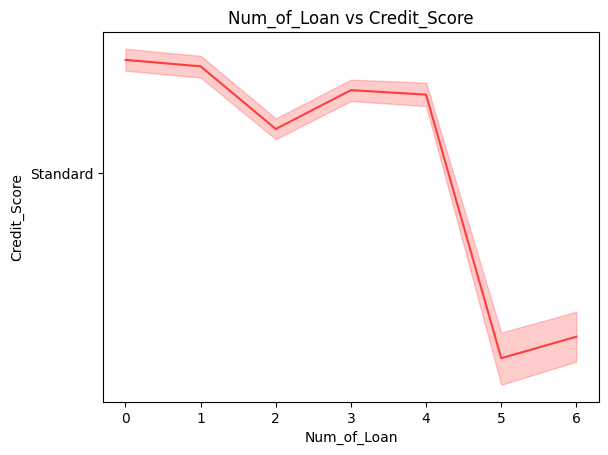

In [207]:
sns.lineplot(x=df["Num_of_Loan"],y=df["Credit_Score"],color="red",alpha=0.7)
plt.title("Num_of_Loan vs Credit_Score")
plt.xlabel("Num_of_Loan")
plt.ylabel("Credit_Score")
plt.show()

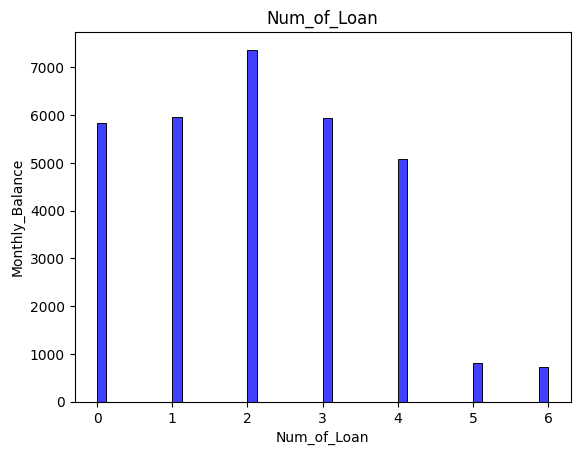

In [208]:

sns.histplot(x=df['Num_of_Loan'], color='blue')
plt.title('Num_of_Loan')
plt.xlabel('Num_of_Loan')
plt.ylabel('Monthly_Balance')
plt.show()

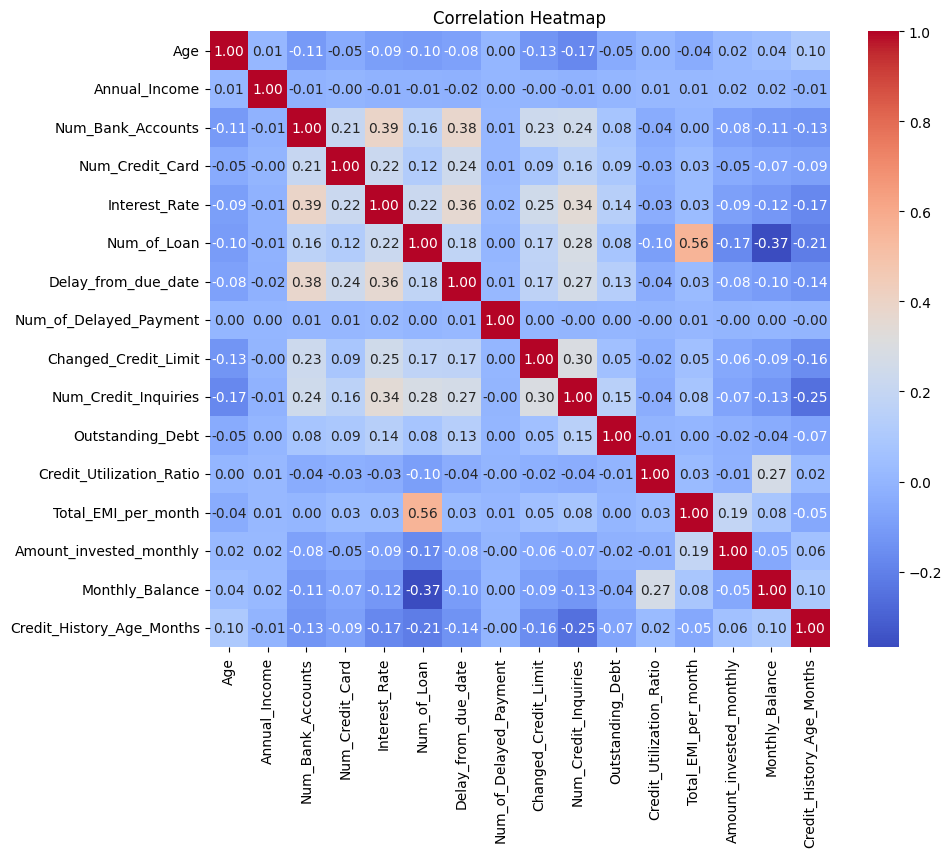

In [209]:
#correlaation using heatmap

url = "https://drive.google.com/uc?id=1SZzVrF_t3WmgNdSUlo-XaTdkBGHMd54r&export=download"
df = pd.read_csv(url)

df_numerical = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [210]:
data.sample(5)

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
31549,-0.374651,0.333833,-0.614231,0.118542,1.874196,-1.387386,0.646236,-1.666946,-1.115398,-1.387081,-0.754398,1.152465,-1.112374,0.302933,0.906356,Standard,1.177186,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2192,0.440787,-0.462298,1.121108,0.715978,-1.106107,-1.387386,1.591703,1.188720,-1.067529,-0.320924,-0.063573,1.626480,-1.112374,-1.007091,0.262063,Good,1.002637,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4561,0.984412,-0.454077,-1.481900,-1.076332,-1.292375,-1.387386,-0.062865,-0.556409,-1.552201,-1.387081,-0.049675,-1.263218,-1.112374,1.320188,-1.001316,Good,1.131252,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
12032,-0.918277,1.374736,-0.614231,0.715978,-1.664913,-0.077980,-0.771966,-1.349650,-0.860097,-0.320924,-0.439574,1.890161,1.570639,0.468596,1.740186,Standard,0.488176,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
20495,0.440787,1.064171,-0.614231,-1.076332,-0.174762,-0.077980,0.528052,0.395480,0.294738,1.100619,1.138717,-1.222739,1.591432,-1.186301,1.180042,Standard,-0.467249,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [211]:
df.sample()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
22741,47,Developer,42193.03,3,5,10,1,4,8,1.48,2.0,Good,1218.38,30.964315,NM,28.532575,84.151974,High_spent_Small_value_payments,484.824034,Good,322


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 44)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (25368, 43)
X_test: (6343, 43)
y_train: (25368,)
y_test: (6343,)


In [213]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [214]:
y_pred = model.predict(X_test)


In [215]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7067633611855589


In [216]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

        Good       0.55      0.70      0.62      1526
        Poor       0.59      0.20      0.30       856
    Standard       0.79      0.82      0.80      3961

    accuracy                           0.71      6343
   macro avg       0.64      0.57      0.57      6343
weighted avg       0.70      0.71      0.69      6343



In [217]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[1073   44  409]
 [ 216  172  468]
 [ 645   78 3238]]


In [218]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,         # let trees expand fully
    random_state=44,
    n_jobs=-1               # use all CPU cores (faster)
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7952073151505596

Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.77      0.74      1526
        Poor       0.76      0.54      0.63       856
    Standard       0.83      0.86      0.85      3961

    accuracy                           0.80      6343
   macro avg       0.77      0.72      0.74      6343
weighted avg       0.79      0.80      0.79      6343


Confusion Matrix:
[[1174    5  347]
 [  56  460  340]
 [ 408  143 3410]]
